1. Importing necessary Libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,  cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

2. Loading the dataset

In [5]:
df = pd.read_csv("credit_card_data_headers.csv", sep="\t")
df = pd.DataFrame(df)
print(df.head())

   A1     A2     A3    A8  A9  A10  A11  A12  A14  A15  R1
0   1  30.83  0.000  1.25   1    0    1    1  202    0   1
1   0  58.67  4.460  3.04   1    0    6    1   43  560   1
2   0  24.50  0.500  1.50   1    1    0    1  280  824   1
3   1  27.83  1.540  3.75   1    0    5    0  100    3   1
4   1  20.17  5.625  1.71   1    1    0    1  120    0   1


3. Exploratory data analysis (EDA)

In [6]:
print("Dataset shape:", df.shape)
print("Dataset info:", df.info())
print("Missing values in each column:\n", df.isnull().sum())
print("Statistical summary:\n", df.describe().T)
print("Unique values", {col: df[col].nunique() for col in df.columns})


Dataset shape: (654, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      654 non-null    int64  
 1   A2      654 non-null    float64
 2   A3      654 non-null    float64
 3   A8      654 non-null    float64
 4   A9      654 non-null    int64  
 5   A10     654 non-null    int64  
 6   A11     654 non-null    int64  
 7   A12     654 non-null    int64  
 8   A14     654 non-null    int64  
 9   A15     654 non-null    int64  
 10  R1      654 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 56.3 KB
Dataset info: None
Missing values in each column:
 A1     0
A2     0
A3     0
A8     0
A9     0
A10    0
A11    0
A12    0
A14    0
A15    0
R1     0
dtype: int64
Statistical summary:
      count         mean          std    min     25%      50%       75%  \
A1   654.0     0.689602     0.463010   0.00   0.000    1.000    1.0000   
A2   

4. Preprocessing of the dataset

In [7]:
X = df.drop("R1", axis=1)
y = df["R1"]

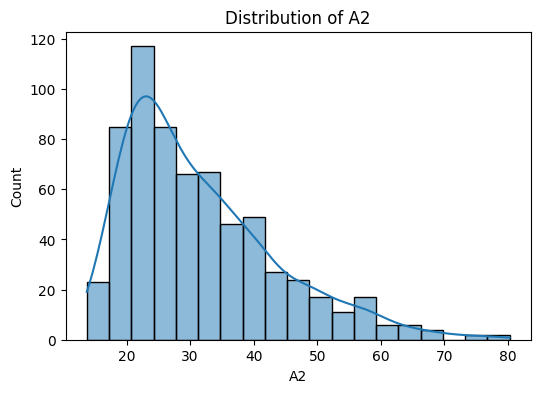

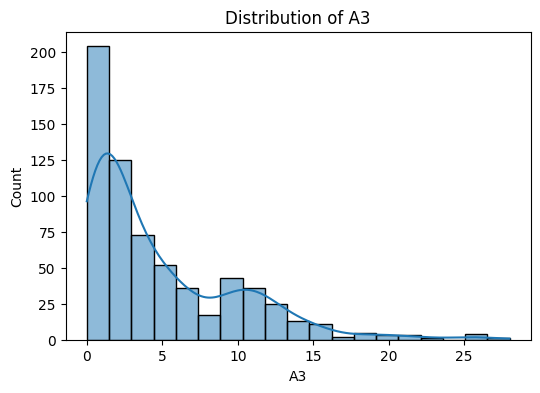

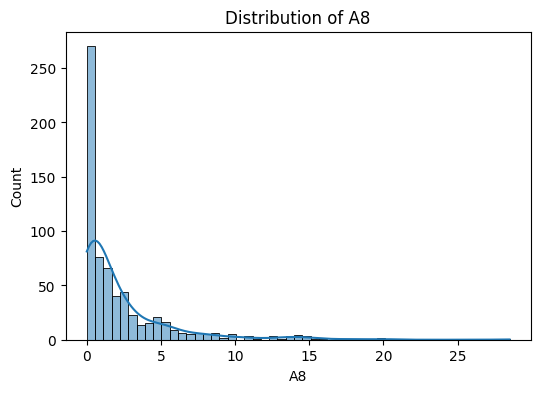

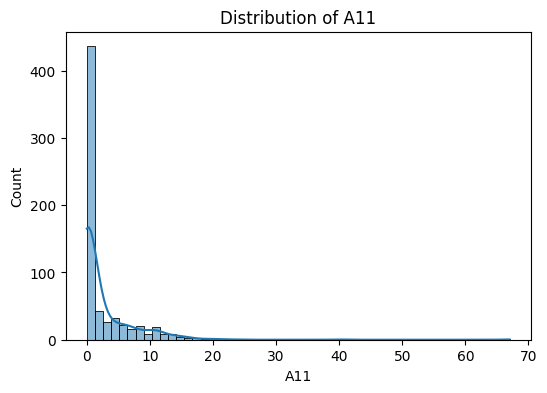

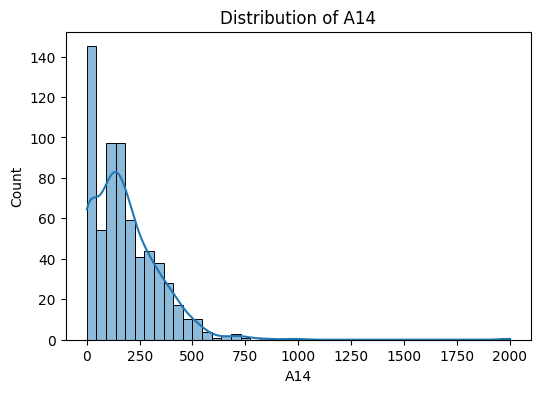

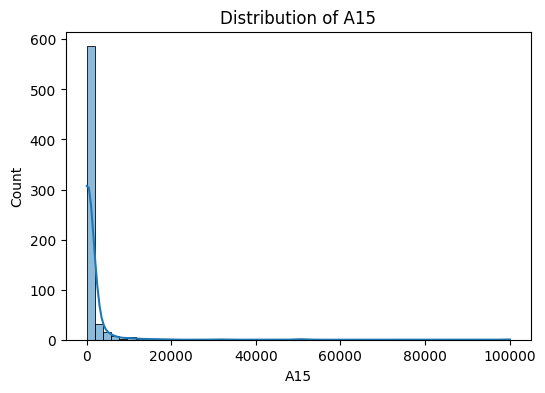

In [8]:
# distribution of X numerical features
cont_features = ['A2','A3','A8','A11','A14','A15']
for col in X[cont_features]:
    plt.figure(figsize=(6,4))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

5. Model training

In [9]:
# Split the data: 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split temp into 50% validation, 50% test → 20% each of total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])


Train size: 392
Validation size: 131
Test size: 131


5.1. Decision tree model

In [10]:
# training decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_train)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_train, y_pred_dt))
y_pred_val_dt = dt_model.predict(X_val)
print("Decision Tree Validation Accuracy:", metrics.accuracy_score(y_val, y_pred_val_dt))

Decision Tree Accuracy: 1.0
Decision Tree Validation Accuracy: 0.7938931297709924


5.2 KNN Model

In [11]:
# standardizing continous features before fitting into KNN model
cont_features = ['A2','A3','A8','A11','A14','A15']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cont_features] = scaler.fit_transform(X_train[cont_features])
X_val_scaled[cont_features] = scaler.transform(X_val[cont_features])
X_test_scaled[cont_features] = scaler.transform(X_test[cont_features])

X_val[cont_features] = scaler.transform(X_val[cont_features])
X_test[cont_features] = scaler.transform(X_test[cont_features])
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_train)
print("KNN Model Accuracy:", metrics.accuracy_score(y_train, y_pred_knn))
y_pred_val_knn = knn_model.predict(X_val)
print("KNN Model Accuracy:", metrics.accuracy_score(y_val, y_pred_val_knn))

KNN Model Accuracy: 0.7857142857142857
KNN Model Accuracy: 0.4580152671755725


6. Model evaluation

6.1 Confusion matrix for decision tree

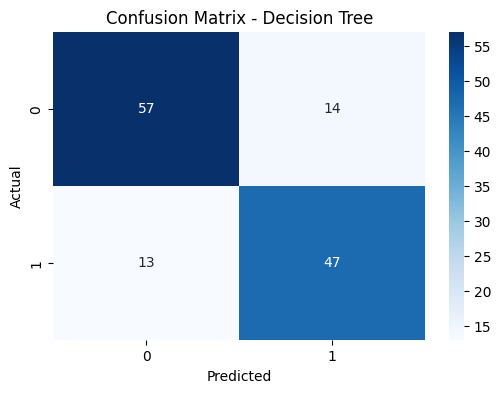

In [12]:
# confusion matrix for decision tree
conf_matrix_dt = metrics.confusion_matrix(y_val, y_pred_val_dt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

6.2 Confusion matrix KNN

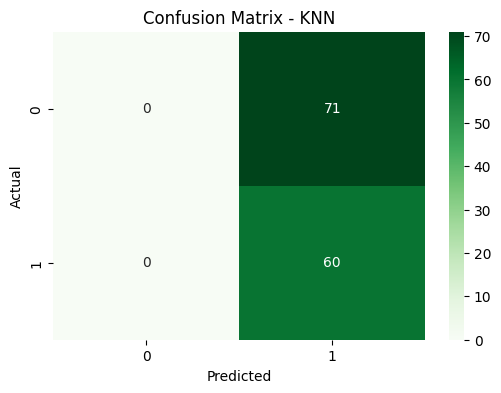

In [13]:
# confusion matrix for KNN
conf_matrix_knn = metrics.confusion_matrix(y_val, y_pred_val_knn)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

7. Model tuning and optimization

7.1 Model tunning and optimization for decision tree

In [14]:
# model tuning and optimization for decision tree
dt_model_optimized = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model_optimized.fit(X_train, y_train)
y_pred_dt_optimized = dt_model_optimized.predict(X_val)
print("Optimized Decision Tree Model Accuracy:", metrics.accuracy_score(y_val, y_pred_dt_optimized))

# Try different max_depth values
depth_values = range(1, 11)
dt_scores = []

for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    dt_scores.append(scores.mean())

# Best depth
best_depth = depth_values[np.argmax(dt_scores)]
print("Best max_depth:", best_depth, "with CV accuracy:", max(dt_scores))

Optimized Decision Tree Model Accuracy: 0.8778625954198473
Best max_depth: 1 with CV accuracy: 0.8596559558584875


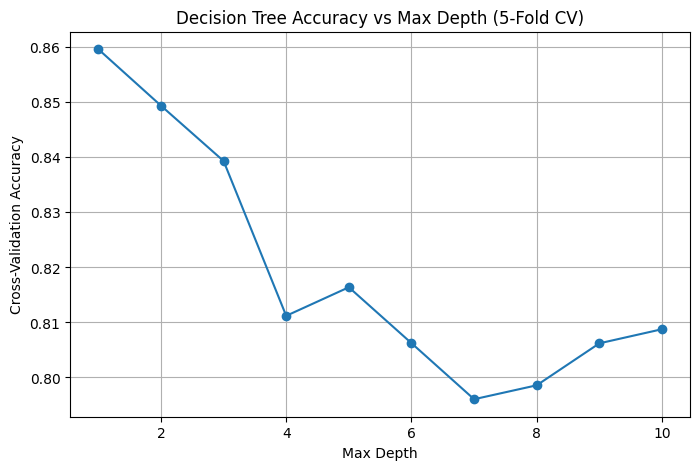

In [15]:
# Plot DT model performance vs max_depth
plt.figure(figsize=(8, 5))
plt.plot(depth_values, dt_scores, marker='o')
plt.title("Decision Tree Accuracy vs Max Depth (5-Fold CV)")
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.grid(True)
plt.show()

7.2 Model tuning and optimization for KNN

In [16]:
# model tunning and optimization for KNN
knn_model_optimized = KNeighborsClassifier(n_neighbors=7)
knn_model_optimized.fit(X_train, y_train)
y_pred_knn_optimized = knn_model_optimized.predict(X_val)
print("Optimized KNN Model Accuracy:", metrics.accuracy_score(y_val, y_pred_knn_optimized))
# hyperparameter tuning and optimization for KNN using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters for KNN:", grid_search.best_params_)
best_knn_model = grid_search.best_estimator_
# y_pred_best_knn = best_knn_model.predict(X_test)
y_pred_best_knn = best_knn_model.predict(X_val)
print("Best KNN Model Accuracy after GridSearchCV:", metrics.accuracy_score(y_val, y_pred_best_knn))
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Best k
best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k, "with CV accuracy:", max(cv_scores))

Optimized KNN Model Accuracy: 0.6183206106870229
Best parameters for KNN: {'n_neighbors': np.int64(6)}
Best KNN Model Accuracy after GridSearchCV: 0.5419847328244275
Best k: 6 with CV accuracy: 0.663161311262577


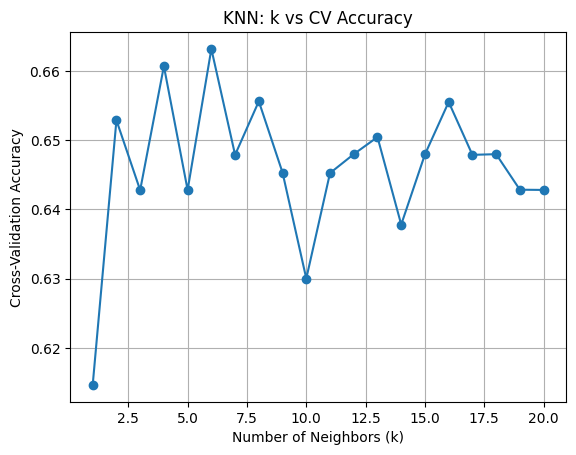

In [17]:
# k_values and cv_scores

plt.figure()
plt.plot(list(k_values), cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: k vs CV Accuracy')
plt.grid(True)
plt.show()


8. Feature importance

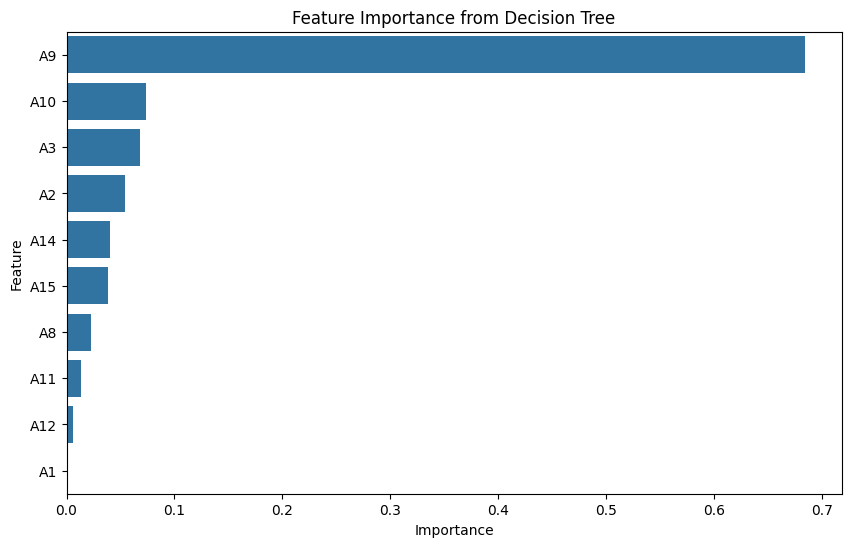

In [18]:
# feature importance
feature_importances = dt_model_optimized.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Decision Tree')
plt.show()

In [19]:
9. 
from sklearn.metrics import accuracy_score, precision_score, classification_report,recall_score, f1_score, confusion_matrix

# Train best KNN
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_val_pred_knn = best_knn.predict(X_val)

# Train best DT
best_dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_dt.fit(X_train, y_train)
y_val_pred_dt = best_dt.predict(X_val)

# Validation metrics
def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    
print_metrics(y_val, y_val_pred_knn, "KNN")
print_metrics(y_val, y_val_pred_dt, "Decision Tree")

--- KNN ---
Accuracy: 0.5419847328244275
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[71  0]
 [60  0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        71
           1       0.00      0.00      0.00        60

    accuracy                           0.54       131
   macro avg       0.27      0.50      0.35       131
weighted avg       0.29      0.54      0.38       131

--- Decision Tree ---
Accuracy: 0.8854961832061069
Precision: 0.8
Recall: 1.0
F1-score: 0.8888888888888888
Confusion Matrix:
 [[56 15]
 [ 0 60]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        71
           1       0.80      1.00      0.89        60

    accuracy                           0.89       131
   macro avg       0.90      0.89      0.89       131
weighted avg       0.91      0.89      0.89       131



c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: 

10. Final model evaluation

In [21]:
# using Decision Tree
y_test_pred = best_dt.predict(X_test)

print_metrics(y_test, y_test_pred, "Decision Tree (Test Set)")

--- Decision Tree (Test Set) ---
Accuracy: 0.8473282442748091
Precision: 0.7746478873239436
Recall: 0.9322033898305084
F1-score: 0.8461538461538461
Confusion Matrix:
 [[56 16]
 [ 4 55]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        72
           1       0.77      0.93      0.85        59

    accuracy                           0.85       131
   macro avg       0.85      0.85      0.85       131
weighted avg       0.86      0.85      0.85       131



Comparison Table For summary:

In [23]:
results = pd.DataFrame({
    "Model": ["KNN (Best k)", "Decision Tree (Best depth)", "Final DT (Test Set)"],
    "Accuracy": [
        accuracy_score(y_val, y_val_pred_knn),
        accuracy_score(y_val, y_val_pred_dt),
        accuracy_score(y_test, y_test_pred)
    ],
    "Recall": [
        recall_score(y_val, y_val_pred_knn),
        recall_score(y_val, y_val_pred_dt),
        recall_score(y_test, y_test_pred)
    ],
    "Precision": [
        precision_score(y_val, y_val_pred_knn),
        precision_score(y_val, y_val_pred_dt),
        precision_score(y_test, y_test_pred)
    ]
})

results

c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Model,Accuracy,Recall,Precision
0,KNN (Best k),0.541985,0.000000,0.000000
1,Decision Tree (Best depth),0.885496,1.000000,0.800000
2,Final DT (Test Set),0.847328,0.932203,0.774648


11. Saving final model

In [ ]:
import joblib

# Save the final decision tree model
joblib.dump(best_dt, "best_decision_tree.joblib")

print("Final Model saved successfully")


Final Model saved successfully
